# **Model for classifying artwork of the best artists using vgg layers**

# training section

importing all the libraries which i will need to implement VGG16
**bold text**



In [5]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout
# from keras import backend as K
import tensorflow.keras.backend as K
import keras
from keras.models import Sequential, Model
from keras.models import load_model
# from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPool2D
from google.colab.patches import cv2_imshow

In [ ]:
# K.tensorflow_backend._get_available_gpus()

# load our training dataset and testing dataset and display it

In [14]:
train_path="/content/drive/MyDrive/untitled folder 6/train"
test_path="/content/drive/MyDrive/untitled folder 6/test"
class_names=os.listdir(train_path)
class_names_test=os.listdir(test_path)

In [15]:
print(class_names)
print(class_names_test)

['Leonardo_da_Vinci', 'Marc_Chagall', 'Michelangelo', 'Mikhail_Vrubel', 'Pablo_Picasso', 'Paul_Cezanne']
['Paul_Cezanne', 'Marc_Chagall', 'Pablo_Picasso', 'Mikhail_Vrubel', 'Leonardo_da_Vinci', 'Michelangelo']


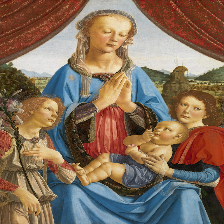

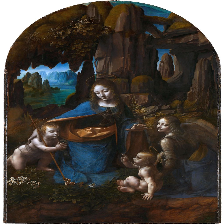

In [ ]:
img1=cv2.imread("/content/drive/MyDrive/untitled folder 6/train/Leonardo_da_Vinci/Leonardo_da_Vinci_1.jpg")
# cv2_imshow(img1)
image1 = cv2.resize(img1, (224,224))
cv2_imshow(image1)
img2=cv2.imread("/content/drive/MyDrive/untitled folder 6/test/Leonardo_da_Vinci/Leonardo_da_Vinci_120.jpg")
image2 = cv2.resize(img2, (224,224))
cv2_imshow(image2)

### **ImageDataGenerator class will progressively load the images in your dataset allowing you to work with both small and very large datasets containing thousands or millions of images that may not fit into system memory**
1. zoom_range for zooming
2. width_shift_range for a horizontal shift of image
3. height_shift_range for a vertical shift of image
4. shear_range for 

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()

### **flow_from_directory() method takes a path of a directory and generates batches of augmented data.**
1. target_size for change the image to 224 by 224
2. batch_size for tensor size
3. class_mode for Set “binary” if you have only two classes to predict, if not set to“categorical”

In [ ]:
train_generator = train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')

Found 801 images belonging to 6 classes.
Found 287 images belonging to 6 classes.


### VGG16 is a convolution neural net (CNN ) architecture :
1. 2 x convolution layer of 64 channel of 3x3 kernal and same padding
2. 1 x maxpool layer of 2x2 pool size and stride 2x2
3. 2 x convolution layer of 128 channel of 3x3 kernal and same padding
4. 1 x maxpool layer of 2x2 pool size and stride 2x2
5. 3 x convolution layer of 256 channel of 3x3 kernal and same padding
6. 1 x maxpool layer of 2x2 pool size and stride 2x2
7. 3 x convolution layer of 512 channel of 3x3 kernal and same padding
8. 1 x maxpool layer of 2x2 pool size and stride 2x2
9. 1 x Dense layer of 4096 units
10. 1 x Dense layer of 4096 units
11. 1 x Dense Softmax layer of 2 units

### some terminology
1. kernel_size : An integer (or tuple/list, but in this case integer) that specifies the width/height (square can be integer) of the convolution window
2. activation : Type of activation function to use. If none specified, it defauts to linear we uses "relu"

3. Maxpolling : After some ReLU layers, programmers may choose to apply a pooling layer. It is also referred to as a downsampling layer.

4. dense : "dense" neuron, which is fully connected to all prior layers of the network.

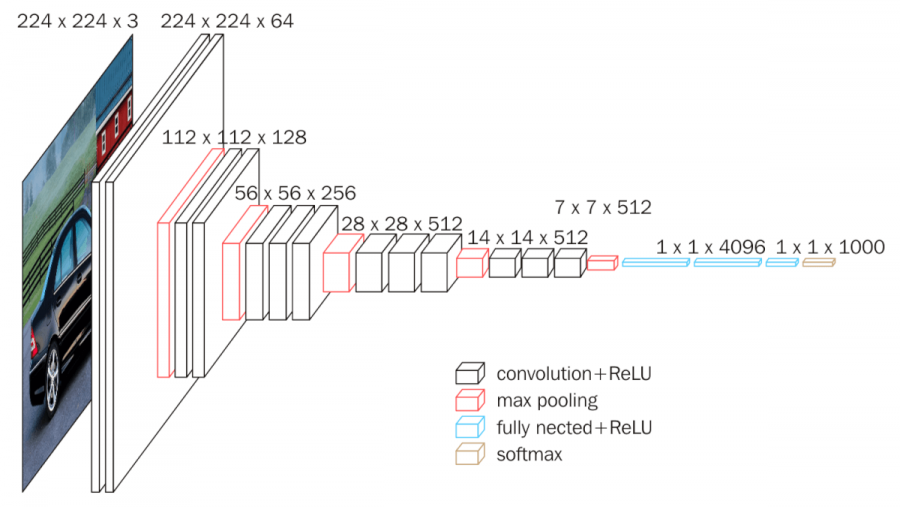

In [ ]:
def VGG16():
    model = Sequential()
    model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
    model.add(Flatten(name='flatten'))
    model.add(Dense(256, activation='relu', name='fc1'))
    model.add(Dense(128, activation='relu', name='fc2'))
    model.add(Dense(6, activation='sigmoid', name='output'))
    return model

###creat model from the vgg16 and print the summary of the layers

In [ ]:
model=VGG16()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
Vgg16 = Model(inputs=model.input, outputs=model.get_layer('vgg16').output)

###Gradient descent optimizer 
1. learing rate = 1000
2. momentum for accelerates gradient descent

In [ ]:
opt = SGD(lr=1e-4, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


EarlyStopping helps us to stop the training of the model early if there is no increase in the parameter which I have set to monitor in EarlyStopping. In this case I am monitoring validation accuracy by passing val_acc to EarlyStopping. I have here set patience to 20 which means that the model will stop to train if it doesn’t see any rise in validation accuracy in 20 epochs.
1. monitor for which monitoring in our sitation the accuracy

In [ ]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

ModelCheckpoint helps us to save the model by monitoring a specific parameter of the model. In this case I am monitoring validation accuracy by passing val_acc to ModelCheckpoint. The model will only be saved to disk if the validation accuracy of the model in current epoch is greater than what it was in the last epoch.


In [ ]:
mc = ModelCheckpoint('/content/gdrive/My Drive/best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

model.fit_generator for fit the training images for training and validate it with test dataset 

In [ ]:
H = model.fit_generator(train_generator,validation_data=test_generator,epochs=2000,verbose=1,callbacks=[mc,es])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/2000
26/26 [==============================] - 1358s 52s/step - loss: 1.7410 - accuracy: 0.3658 - val_loss: 1.6666 - val_accuracy: 0.1847
Epoch 2/2000
26/26 [==============================] - 1342s 52s/step - loss: 1.4402 - accuracy: 0.4182 - val_loss: 1.4629 - val_accuracy: 0.4321
Epoch 3/2000
26/26 [==============================] - 1347s 52s/step - loss: 1.4858 - accuracy: 0.4345 - val_loss: 1.5216 - val_accuracy: 0.5087
Epoch 4/2000
26/26 [==============================] - 1348s 52s/step - loss: 1.5002 - accuracy: 0.4045 - val_loss: 1.6741 - val_accuracy: 0.1742
Epoch 5/2000
26/26 [==============================] - ETA: 0s - loss: 1.5597 - accuracy: 0.3620 

valuate_generator for output a list of 2 indices:
1. 

In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[1.3368984460830688, 0.6062718033790588]

plot the accuracy and loos with each epoch

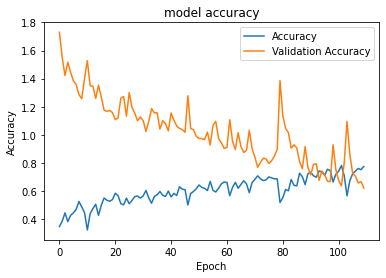

In [ ]:
import matplotlib.pyplot as plt
plt.plot(H.history["accuracy"])
# plt.plot(H.history['val_accuracy'])
plt.plot(H.history['loss'])
# plt.plot(H.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","loss"])
plt.show()

In [ ]:
# labels = (test_generator.class_indices)
# labels = dict((v,k) for k,v in labels.items())
# predictions = [labels[k] for k in predicted_class_indices]

onverting the model into JSON format to save it for the inference program in the future.

In [ ]:
model_json = model.to_json()
with open("/content/gdrive/My Drive/model.json","w") as json_file:
  json_file.write(model_json)

#Prediction

load the json file of the model and resize the test image to 224 by 224 for the layer and try to predict the class 

In [26]:
from keras.models import model_from_json
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

In [27]:
def predict_(image_path):
    #Load the Model from Json File
    json_file = open('/content/drive/MyDrive/untitled folder 6/model.json', 'r')
    model_json_c = json_file.read()
    json_file.close()
    model_c = model_from_json(model_json_c)
    #Load the weights
    model_c.load_weights("/content/drive/MyDrive/untitled folder 6/best_model1.h5")
    #Compile the model
    # opt = SGD(lr=1e-4, momentum=0.9)
    # model_c.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
    #load the image you want to classify
    #image = cv2.imread(image_path)
    #image = cv2.resize(image, (224,224))
    #np.expand_dims(image, axis=0)
    #image.shape()
    image= load_img(image_path, target_size=(224,224))
    plt.imshow(image)
    image=img_to_array(image)
    image=image.reshape((1,224,224,3))
    # #predict the image
    preds = model_c.predict_generator(image)
    pred=np.argmax(preds)
    print(class_names[pred])
    # if preds==0:
    #     print("Predicted Label:Leonardo_da_Vinci")
    # else:
    #     print("Predicted Label: Marc_Chagall")

In [20]:
class_names

['Leonardo_da_Vinci',
 'Marc_Chagall',
 'Michelangelo',
 'Mikhail_Vrubel',
 'Pablo_Picasso',
 'Paul_Cezanne']

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Pablo_Picasso


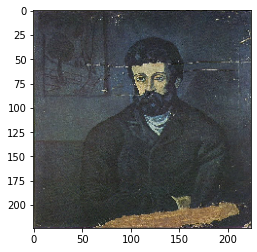

In [30]:
predict_("/content/drive/MyDrive/untitled folder 6/test/Pablo_Picasso/Pablo_Picasso_308.jpg")
